In [34]:
import math
import statistics
import numpy as np
import pandas as pd 
import seaborn as sns 
import scipy.stats as stats  
import matplotlib.pyplot as plt 

In [2]:
# create path variable for imported csv file
carmax_data_import_path = "Carmax - Main (Modified).csv"
# read in csv file as carmax_data_modified using import path variable
carmax_data_modified = pd.read_csv(carmax_data_import_path, index_col=0)

# create backup of carmax_data_modified as carmax_df
carmax_df = carmax_data_modified.copy()
carmax_df 

,insert_num,vehicle_make,vehicle_model,vehicle_year,purchase_price,trade_in,financing,customer_age,customer_income,customer_gender,previous_purchase,distance_to_dealer,post_purchase_satisfaction,warranty,subsequent_purchases
0,81690,DODGE,CHARGER,2012,17501,True,True,25.5,50001,U,False,8.0,0.0,False,1
1,109994,FORD,F150,2007,17501,False,False,55.5,10000,F,True,19.0,0.0,False,0
2,11399,BMW,328,2010,27501,True,True,45.5,70001,F,True,21.0,0.0,False,0
3,214156,LEXUS,GS 300,2003,12501,False,True,25.5,30001,M,False,8.0,0.0,False,0
4,36685,CHEVROLET,CRUZE,2012,17501,True,True,35.5,130001,M,True,5.0,0.0,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355869,195314,JEEP,LIBERTY,2010,17501,False,True,25.5,30001,F,False,13.0,0.0,False,0
355870,58219,CHEVROLET,SONIC,2012,12501,True,False,75.5,0,U,False,2.0,0.0,False,0
355871,207386,KIA,SORENTO,2012,17501,True,True,65.5,30001,F,True,9.0,0.0,False,1
355872,252391,NISSAN,350Z,2003,12501,False,True,25.5,50001,M,False,5.0,0.0,False,0


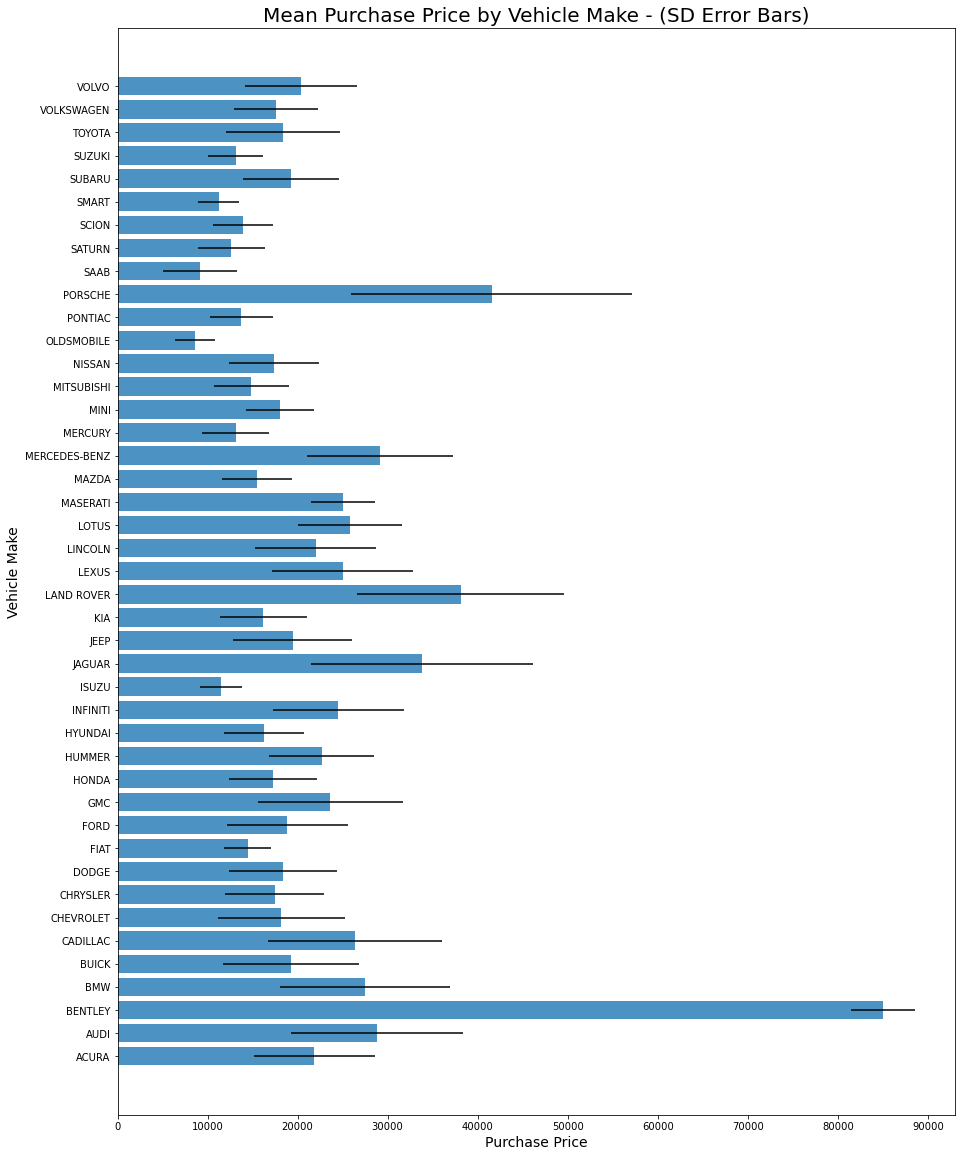

In [5]:
# create data frame containing vehicle_make and purchase_price columns
vehicle_make_by_price = carmax_df.loc[:, ['vehicle_make', 'purchase_price']] 
# group by vehicle_make and mean purchase_price
vehicle_make_by_price_mean = vehicle_make_by_price.groupby('vehicle_make')['purchase_price'].mean().reset_index()
# group by vehicle_make and standard deviation of purchase_price
vehicle_make_by_price_sd = vehicle_make_by_price.groupby('vehicle_make')['purchase_price'].std().reset_index()

# set figure size
plt.figure(figsize=(15, 20))
# create multiple axes 
ax = plt.subplot()
# set ticks on x-axis
ax.set_xticks(range(0, 100000, 10000))
# create horizontal bar plot with error bars
plt.barh(vehicle_make_by_price_mean['vehicle_make'], vehicle_make_by_price_mean['purchase_price'], xerr=vehicle_make_by_price_sd['purchase_price'], alpha=0.8)
# set x-axis label
plt.xlabel("Purchase Price", fontsize=14)
# set y-axis label
plt.ylabel("Vehicle Make", fontsize=14)
# add title
plt.title("Mean Purchase Price by Vehicle Make - (SD Error Bars)", fontsize=20)
# show plot results
plt.show()  

In [6]:
# create data frame containing the proportion of each vehicle make
proportion_of_vehicle_make = carmax_df["vehicle_make"].value_counts(normalize=True, sort=True).reset_index()
# create data frame containing the count for each vehicle make
count_of_vehicle_make = carmax_df["vehicle_make"].value_counts(sort=True).reset_index()
# inner join count and proportion data frames
merged_df = count_of_vehicle_make.merge(proportion_of_vehicle_make, on='index')
# rename columns
merged_df.rename(columns = {'index':'vehicle_make', 'vehicle_make_x':'count', 'vehicle_make_y':'proportion'}, inplace=True)
# print result
merged_df 

,vehicle_make,count,proportion
0,FORD,40213,0.112998
1,TOYOTA,40136,0.112781
2,NISSAN,38989,0.109558
3,CHEVROLET,37857,0.106378
4,HONDA,26607,0.074765
5,DODGE,20429,0.057405
6,HYUNDAI,14070,0.039536
7,JEEP,11595,0.032582
8,BMW,11040,0.031022
9,VOLKSWAGEN,10630,0.029870


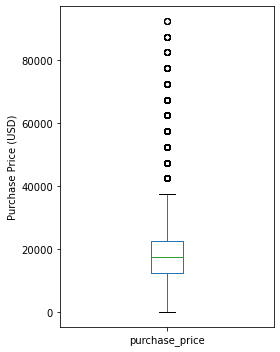

In [9]:
# box plot
ax = (carmax_df['purchase_price']).plot.box(figsize=(4, 5))
ax.set_ylabel('Purchase Price (USD)')

plt.tight_layout()
plt.show()

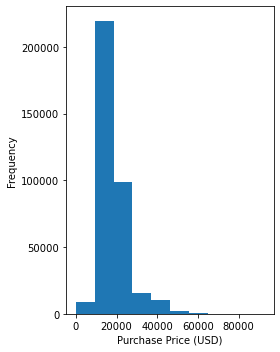

In [11]:
# histogram
ax = (carmax_df['purchase_price']).plot.hist(figsize=(4, 5))
ax.set_xlabel('Purchase Price (USD)')

plt.tight_layout()
plt.show()

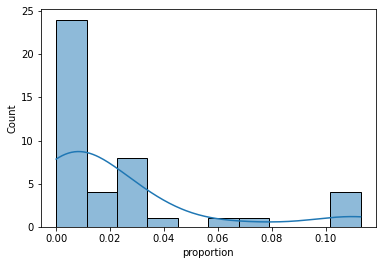

In [12]:
# probability density
X=merged_df['proportion']
sns.histplot(X, kde=True, bins=10)
plt.show()

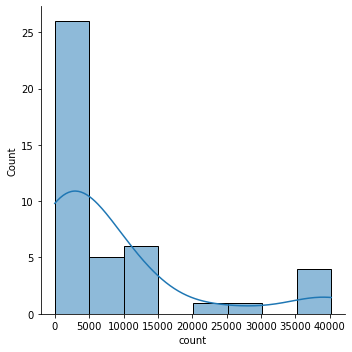

In [13]:
# propability density
X=merged_df['count']
sns.displot(X, kde=True, bins=8)
plt.show() 